In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
file_path = "/content/drive/MyDrive/CS210_Datas/gelen turist datası/Türkiye'ye giriş yapan yabancılar/data.xlsx"
file_path2 = '/content/drive/MyDrive/CS210_Datas/Türkiye ekonomisi/kurlar.xlsx'

Mounted at /content/drive/


In [ ]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
turist_df = pd.read_excel(file_path,skiprows=3) 
kur_df = pd.read_excel(file_path2)

In [ ]:
turist_df

kur_df = kur_df.drop("Unnamed: 3",axis=1)
kur_df = kur_df.drop("Unnamed: 2",axis=1)
kur_df = kur_df.drop("kur",axis=1)
#kur_df

In [ ]:
kur_df['tarih'] = pd.to_datetime(kur_df['tarih'], format='%d.%m.%Y')
kur_comp = kur_df.groupby(kur_df['tarih'].dt.year).mean()
kur_comp.reset_index(inplace=True)
kur_comp

<ipython-input-11-3c787893b9c0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kur_comp = kur_df.groupby(kur_df['tarih'].dt.year).mean()


,tarih,alış,satış
0,2014,2.210100,2.213333
1,2015,2.722083,2.727025
2,2016,3.003025,3.012782
3,2017,3.661442,3.668050
4,2018,4.851017,4.859750
5,2019,5.680050,5.690275
6,2020,7.012400,7.025058
7,2021,8.771150,8.786958
8,2022,16.527858,16.557617
9,2023,19.051100,19.085460


In [ ]:
kur = kur_comp.loc[0:8, 'alış'].tolist()
print(kur)

[2.2101, 2.7220833333333334, 3.0030249999999996, 3.6614416666666667, 4.851016666666667, 5.6800500000000005, 7.0123999999999995, 8.77115, 16.527858333333334]


In [ ]:
all_turists = []
regions = ["OECD Countries (Europe)", "OECD Countries (other)", "Other european countries", "Com.of ındependent states", "Asian Countries", "Southeast Asian Count", "South Asian Countries", "West Asian Countries", "African Countries", "American Countries"]


def extract_data(df):
    start_year = 2014
    rows_to_extract = ["OECD Ülkeleri (Avrupa) - OECD Countries (Europe)", "OECD Ülkeleri (diğer) - OECD Countries (other)", "Diğer Avrupa Ülkeleri - Other european countries", 
                      "Bağımsız Devletler Top. - Com.of ındependent states", "Doğu Asya Ülkeleri-East  Asian Countries", "Güneydoğu Asya Ülkeleri - Southeast Asian Count.", 
                      "Güney Asya Ülkeleri - South Asian Countries", "Batı Asya Ülkeleri - West Asian Countries", "Afrika Ülkeleri - African Countries", 
                      "Amerika Ülkeleri - American Countries"]
    
    extracted_data = []
    
    # Get the column indices starting from 2014
    start_idx = df.columns.get_loc(start_year)
    column_indices = range(start_idx, len(df.columns))
    
    # Iterate over the column indices
    for idx in column_indices:
        # Get the column name
        column_name = df.columns[idx]
        
        # Extract data for the specified rows in the column
        column_data = df[df['Milliyet - Nationality'].isin(rows_to_extract)][column_name].tolist()
        print(column_data)
        
        # Append the extracted data to the list
        extracted_data.append(column_data)
    
    return extracted_data


all_turists = extract_data(turist_df)

print(all_turists)


[16376814.0, 1670819.0, 3066220.0, 8850923.0, 273396.0, 260962.0, 1797290.0, 3377008.0, 888107.0, 228035.0]
[15870330.0, 1628522.0, 3231773.0, 8134242.0, 388726.0, 266339.0, 1941867.0, 3563993.0, 885887.0, 278140.0]
[10352977.0, 851248.0, 2808773.0, 5670686.0, 233896.0, 187876.0, 1860354.0, 2505651.0, 666727.0, 175025.0]
[9927582.0, 688545.0, 3220760.0, 10618403.0, 332825.0, 263241.0, 2733843.0, 3593001.0, 794254.0, 182847.0]
[13074403.0, 947283.0, 4306151.0, 11847714.0, 532946.0, 403055.0, 2347337.0, 4507854.0, 1156667.0, 286638.0]
[15162487.0, 1241834.0, 4964914.0, 13157885.0, 591504.0, 492111.0, 2566329.0, 5001934.0, 1439286.0, 342393.0]
[3571777.0, 269668.0, 2009596.0, 4350741.0, 65554.0, 121079.0, 521080.0, 1255986.0, 474147.0, 64469.0]
[7221277.0, 519277.0, 2973702.0, 8742390.0, 52166.0, 125828.0, 1367397.0, 2652676.0, 878804.0, 115998.0]
[17106276.0, 1589935.0, 5544613.0, 10056039.0, 157335.0, 408292.0, 2828415.0, 4938795.0, 1494863.0, 349717.0]
[[16376814.0, 1670819.0, 3066220.

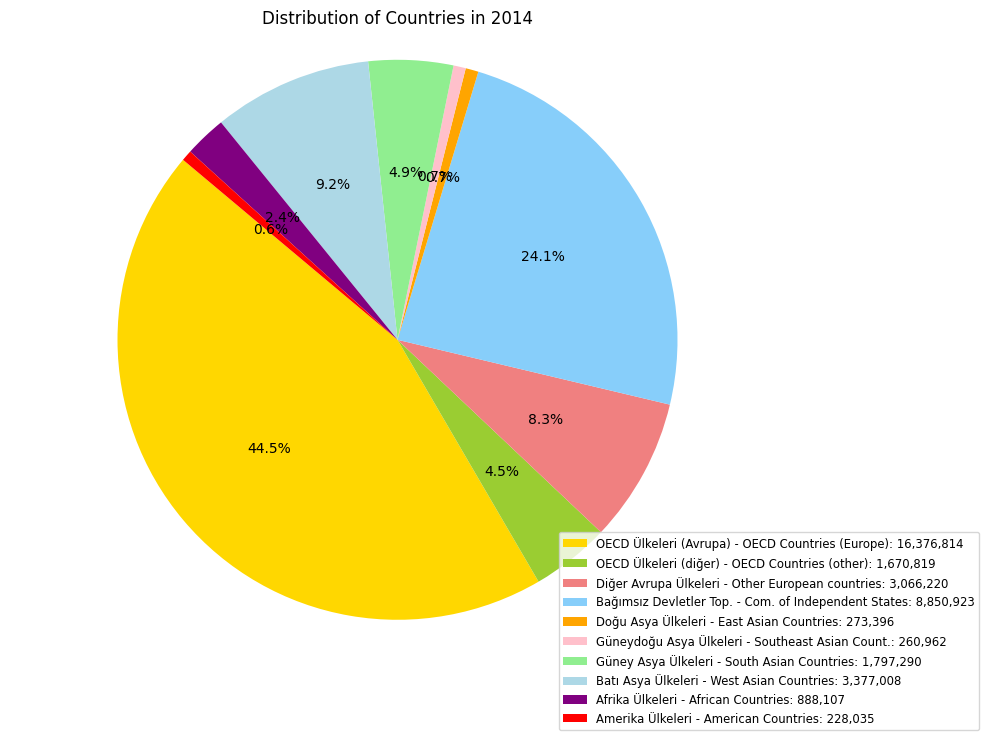

44.5


In [ ]:
year2014 = all_turists[0]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2014, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2014')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2014)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()









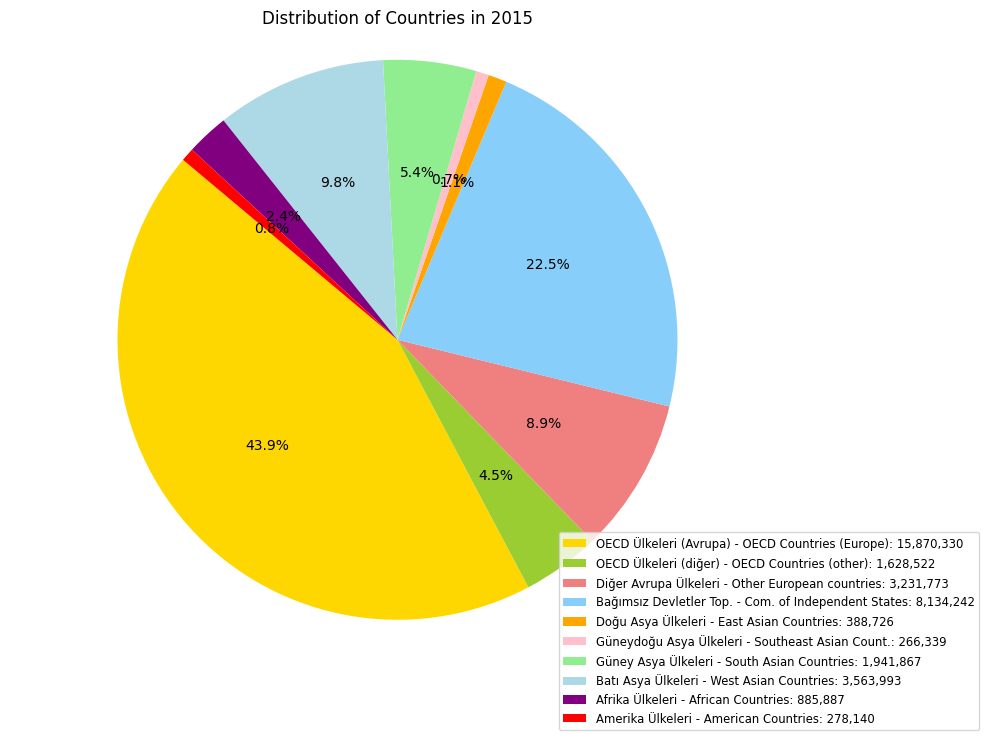

43.9


In [ ]:
year2015 = all_turists[1]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2015, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2015')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2015)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



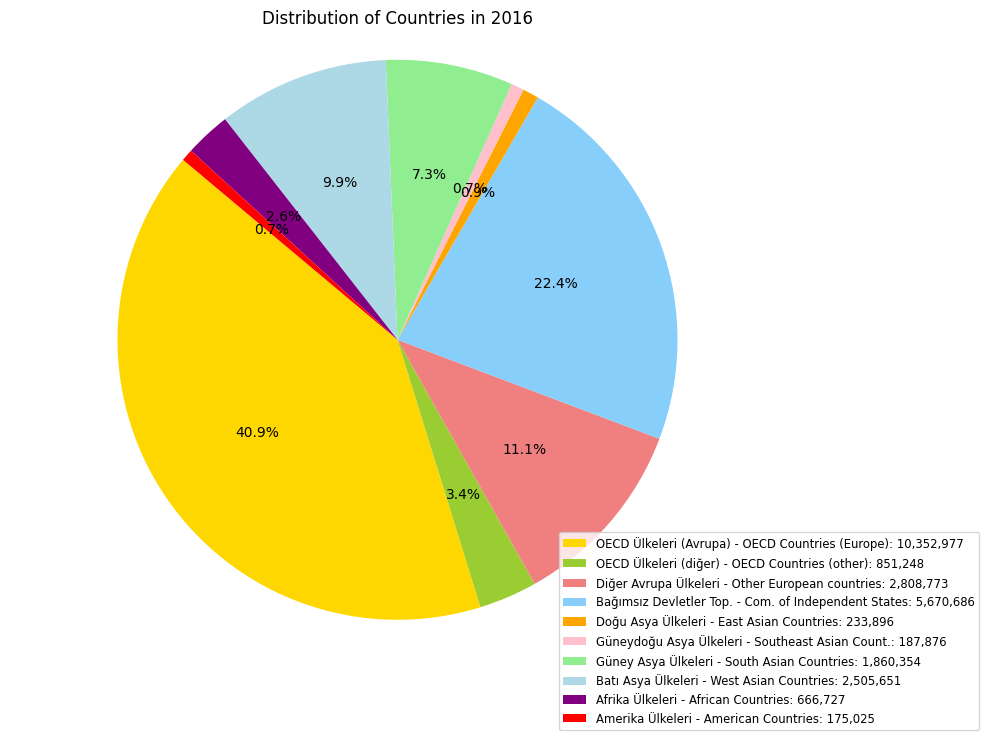

40.9


In [ ]:
year2016 = all_turists[2]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2016, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2016')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2016)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



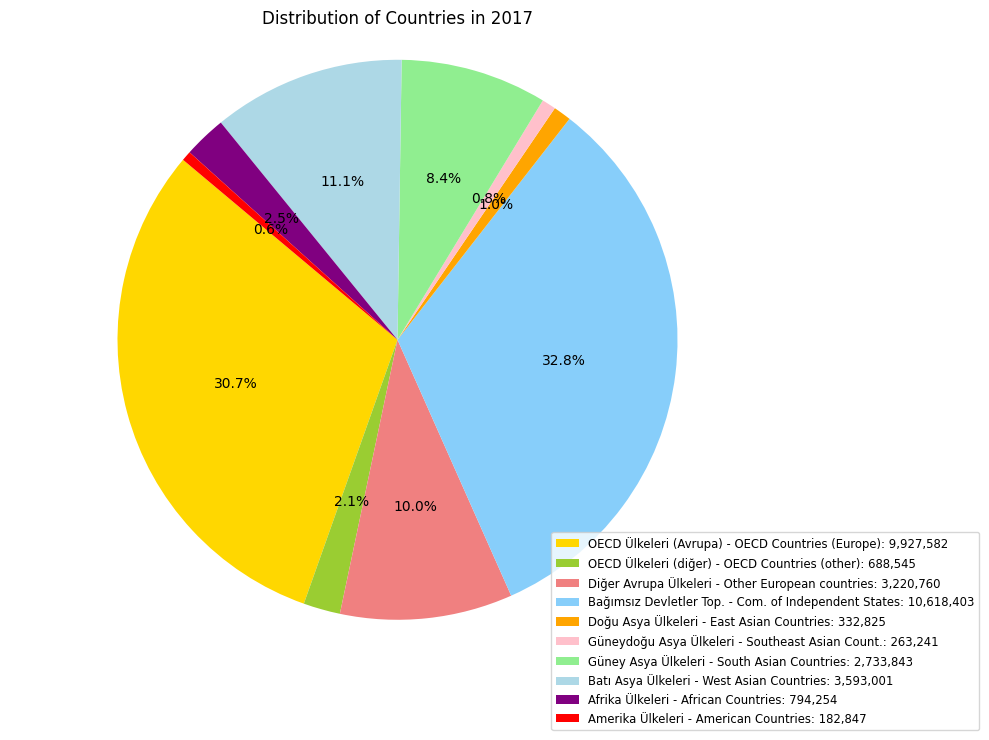

30.7


In [ ]:
year2017 = all_turists[3]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2017, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2017')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2017)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



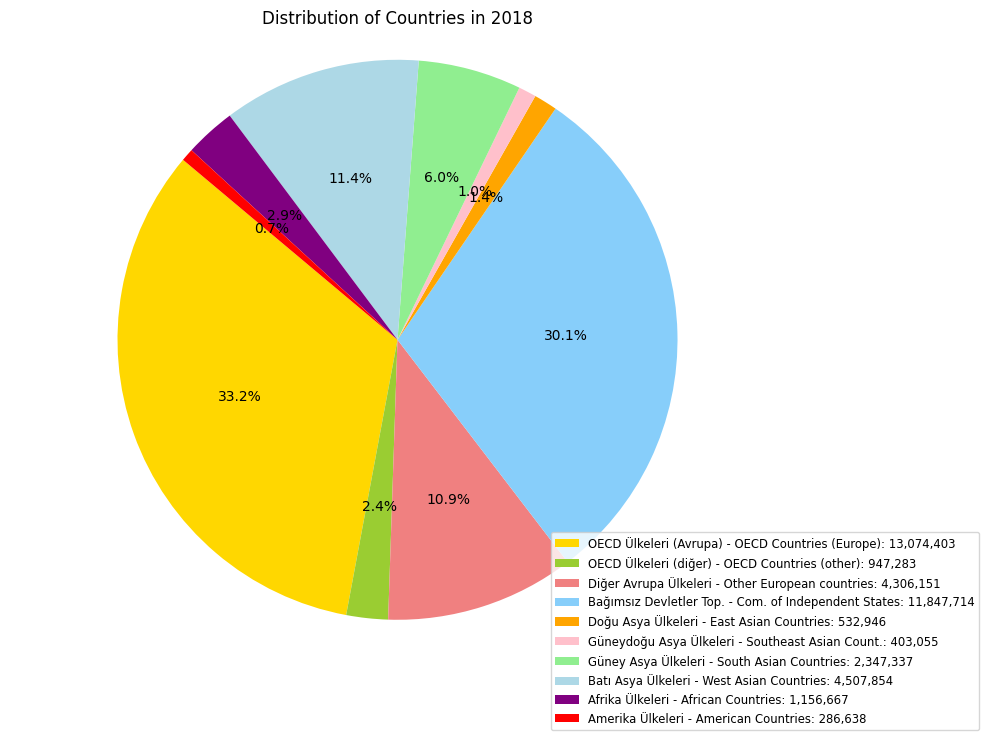

33.2


In [ ]:
year2018 = all_turists[4]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2018, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2018')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2018)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



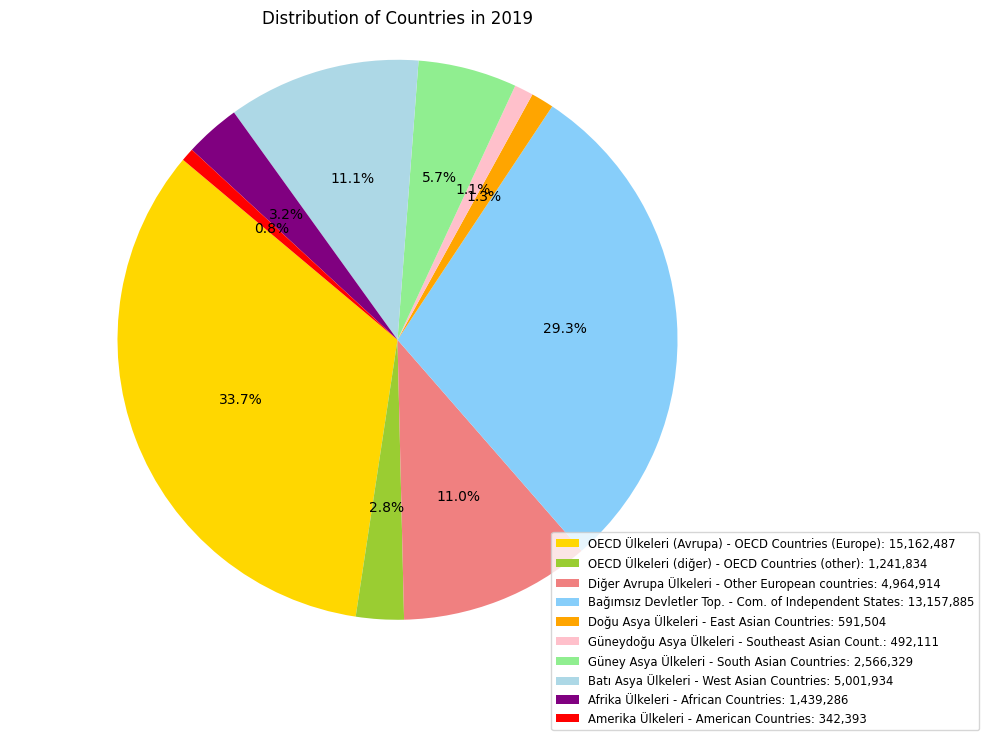

33.7


In [ ]:
year2019 = all_turists[5]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2019, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2019')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2019)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



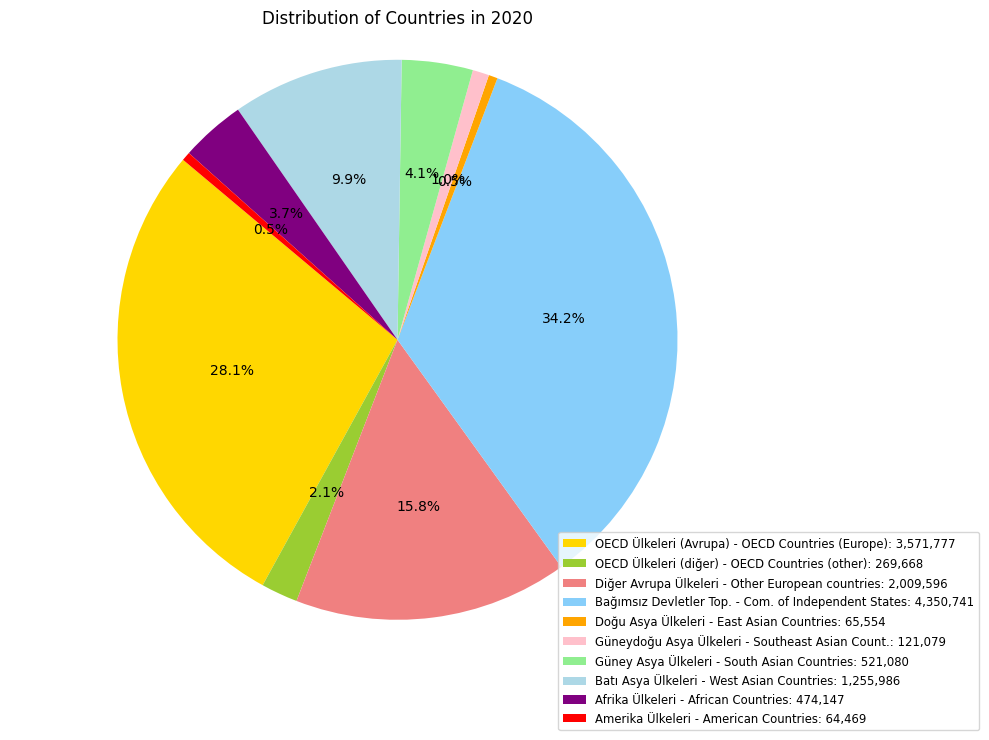

28.1


In [ ]:
year2020 = all_turists[6]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2020, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2020')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2020)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



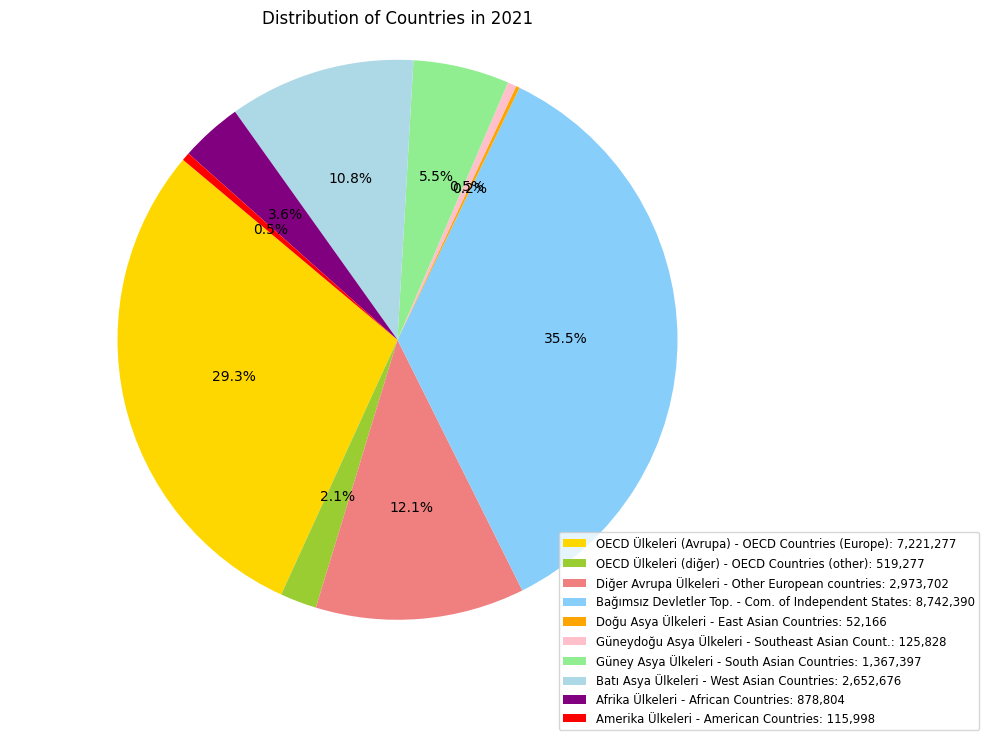

29.3


In [ ]:
year2021 = all_turists[7]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2021, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2021')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2021)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()



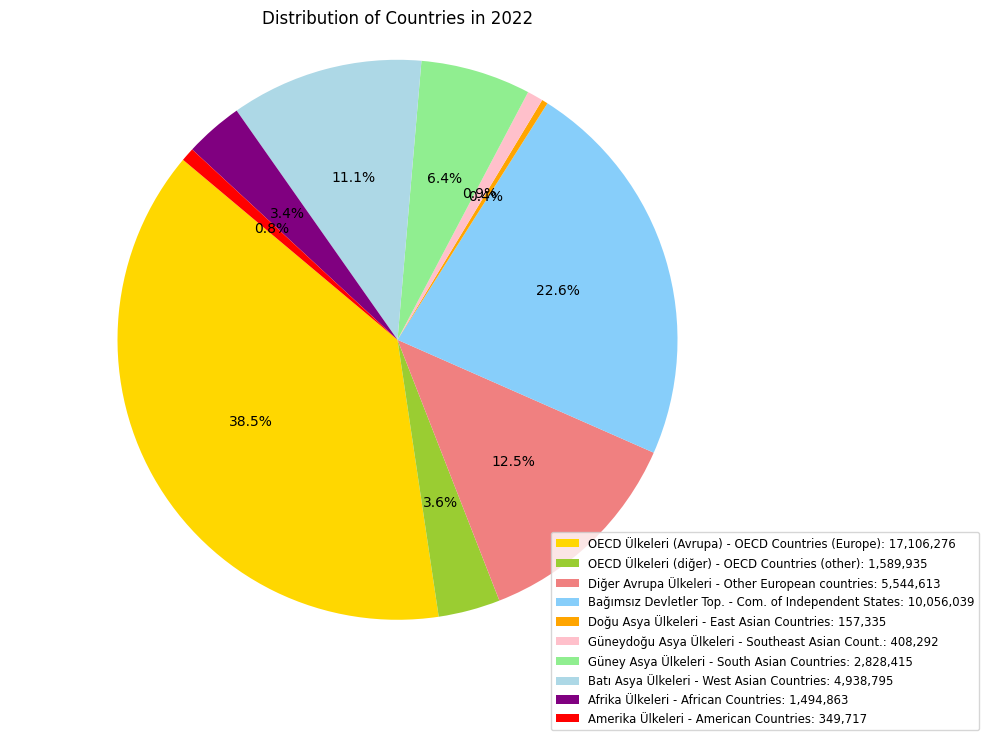

38.5


In [ ]:
year2022 = all_turists[8]

labels = [
    "OECD Ülkeleri (Avrupa) - OECD Countries (Europe)",
    "OECD Ülkeleri (diğer) - OECD Countries (other)",
    "Diğer Avrupa Ülkeleri - Other European countries",
    "Bağımsız Devletler Top. - Com. of Independent States",
    "Doğu Asya Ülkeleri - East Asian Countries",
    "Güneydoğu Asya Ülkeleri - Southeast Asian Count.",
    "Güney Asya Ülkeleri - South Asian Countries",
    "Batı Asya Ülkeleri - West Asian Countries",
    "Afrika Ülkeleri - African Countries",
    "Amerika Ülkeleri - American Countries"
]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink', 'lightgreen', 'lightblue', 'purple', 'red']


# Plotting the pie chart
patches, texts, autotexts = plt.pie(year2022, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Countries in 2022')

# Creating a legend with color boxes and labels
legend_labels = [f'{label}: {value:,.0f}' for label, value in zip(labels, year2022)]
legend = plt.legend(patches, legend_labels, loc="lower right", fontsize="small",
                    bbox_to_anchor=(1.1, 0), bbox_transform=plt.gcf().transFigure)

# Adding percentage values inside the pie chart slices in black
for autotext in autotexts:
    autotext.set_color('black')

# Enlarging the pie chart and legend
plt.gcf().set_size_inches(10, 8)

plt.show()




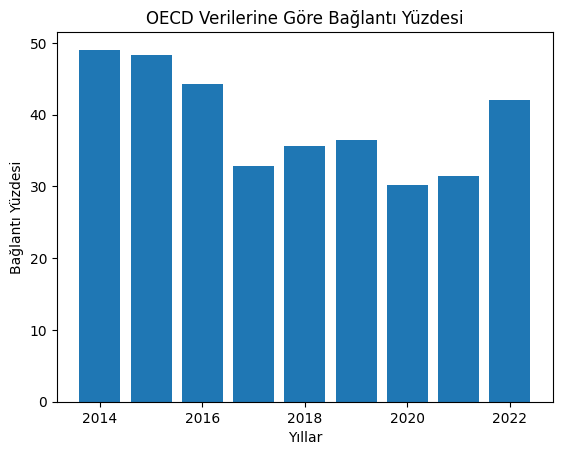

In [ ]:
oecd_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][0] + all_turists[i][1]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  oecd_data.append(perc)







plt.bar(years, oecd_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('OECD Verilerine Göre Bağlantı Yüzdesi')


plt.show()

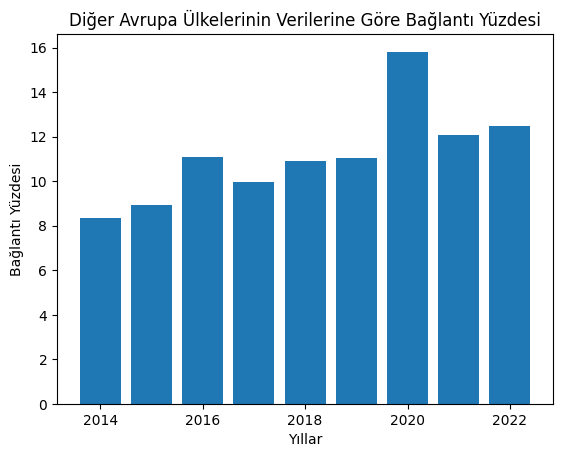

In [86]:
other_european_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][2]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  other_european_data.append(perc)







plt.bar(years, other_european_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Diğer Avrupa Ülkelerinin Verilerine Göre Bağlantı Yüzdesi')


plt.show()

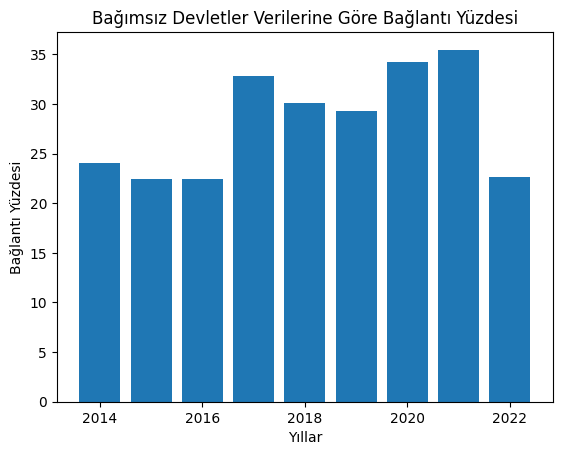

In [84]:
independent_states_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][3]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  independent_states_data.append(perc)






plt.bar(years, independent_states_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Bağımsız Devletler Verilerine Göre Bağlantı Yüzdesi')


plt.show()

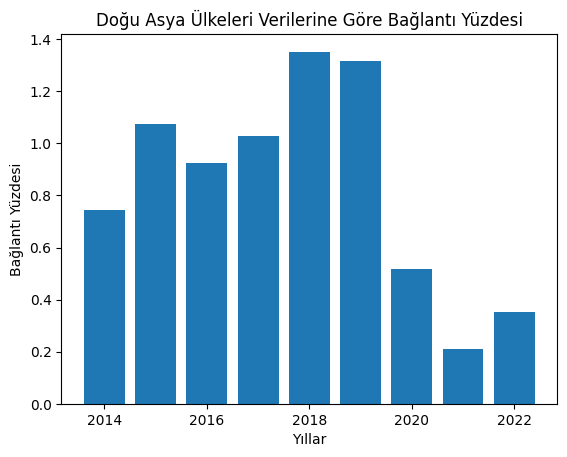

In [88]:
east_asian_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][4]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  east_asian_data.append(perc)







plt.bar(years, east_asian_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Doğu Asya Ülkeleri Verilerine Göre Bağlantı Yüzdesi')


plt.show()

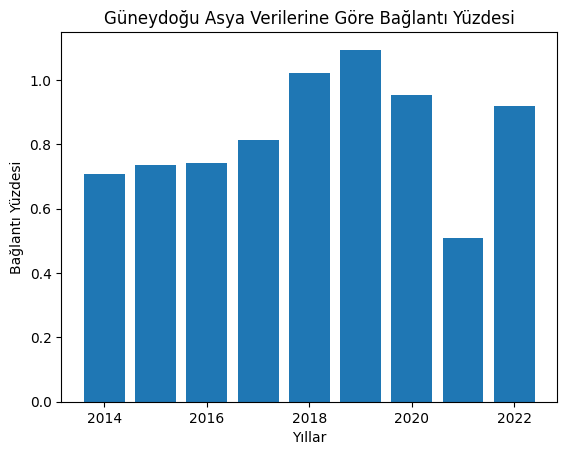

In [89]:
south_east_asian_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][5]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  south_east_asian_data.append(perc)








plt.bar(years, south_east_asian_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Güneydoğu Asya Verilerine Göre Bağlantı Yüzdesi')


plt.show()

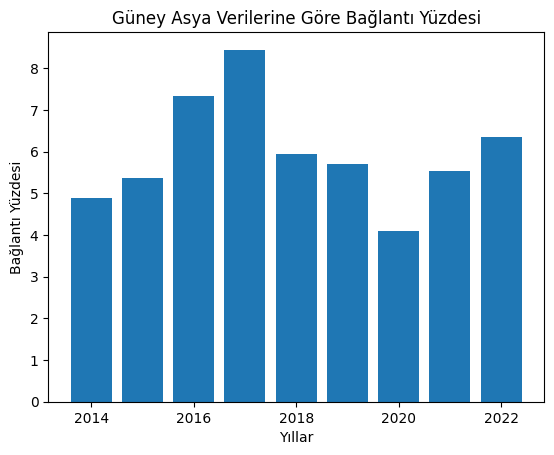

In [90]:
south_asian_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][6]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  south_asian_data.append(perc)



other_european_data independent_states_data east_asian_data south_east_asian_data south_asian_data



plt.bar(years, south_asian_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Güney Asya Verilerine Göre Bağlantı Yüzdesi')


plt.show()

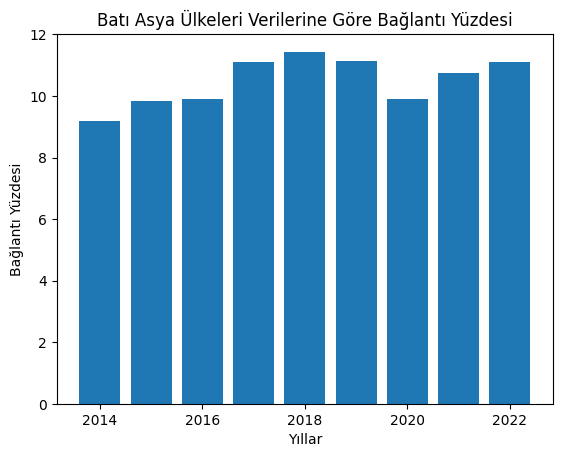

In [ ]:
west_asian_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][7]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  west_asian_data.append(perc)






plt.bar(years, west_asian_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Batı Asya Ülkeleri Verilerine Göre Bağlantı Yüzdesi')


plt.show()

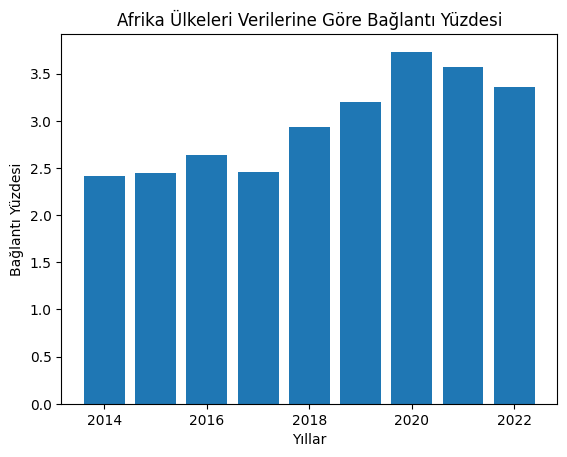

In [91]:
african_countries_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][8]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  african_countries_data.append(perc)






plt.bar(years, african_countries_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Afrika Ülkeleri Verilerine Göre Bağlantı Yüzdesi')


plt.show()

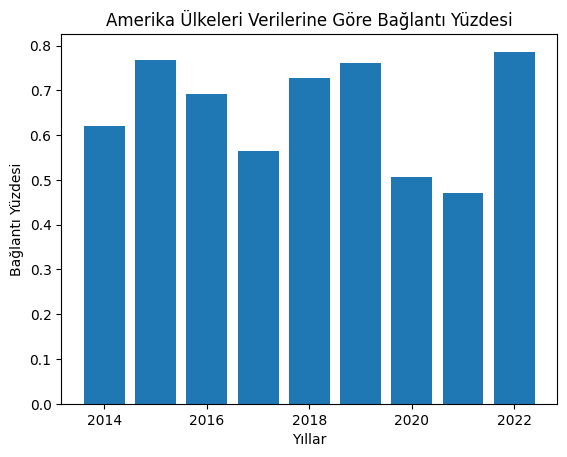

In [93]:
american_countries_data = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020 ,2021, 2022]

for i in range(len(all_turists)):
  num1 = all_turists[i][9]
  num2 = sum(all_turists[i])
  perc = num1 / num2 * 100
  american_countries_data.append(perc)








plt.bar(years, american_countries_data, width=0.8, align='center')


plt.xlabel('Yıllar')
plt.ylabel('Bağlantı Yüzdesi')
plt.title('Amerika Ülkeleri Verilerine Göre Bağlantı Yüzdesi')


plt.show()

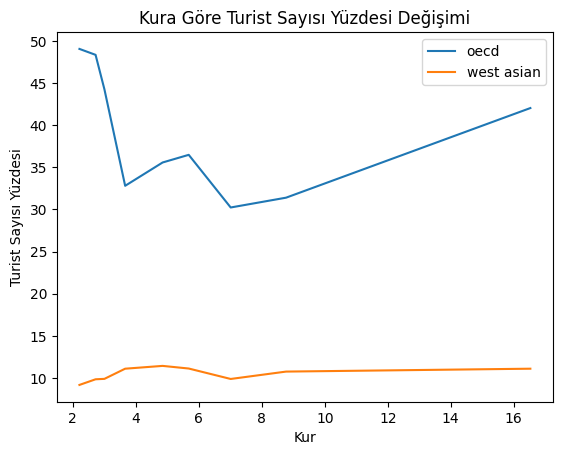

In [94]:


plt.plot(kur, oecd_data, label='oecd')
plt.plot(kur, west_asian_data, label='west asian')


plt.xlabel('Kur')
plt.ylabel('Turist Sayısı Yüzdesi')
plt.title('Kura Göre Turist Sayısı Yüzdesi Değişimi')


plt.legend()


plt.show()

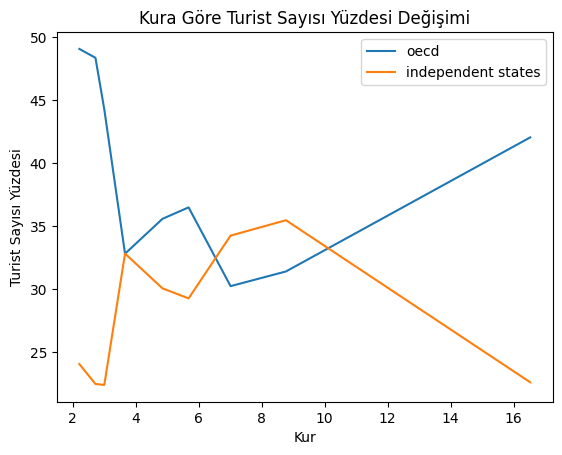

In [82]:

plt.plot(kur, oecd_data, label='oecd')
plt.plot(kur, independent_states_data, label='independent states')


plt.xlabel('Kur')
plt.ylabel('Turist Sayısı Yüzdesi')
plt.title('Kura Göre Turist Sayısı Yüzdesi Değişimi')


plt.legend()


plt.show()

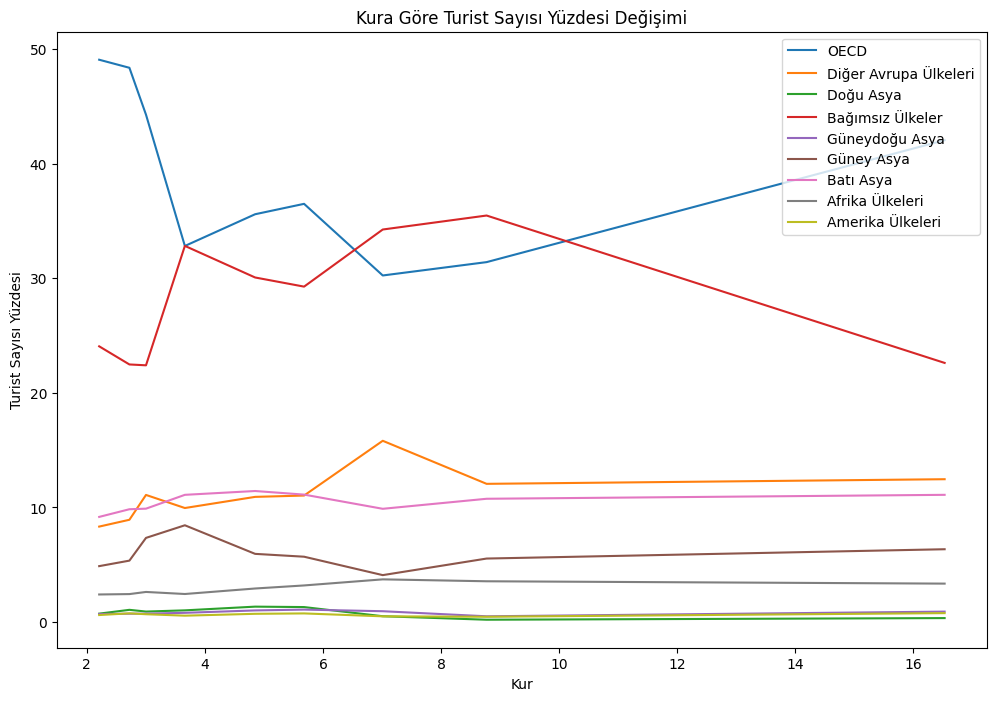

In [98]:
plt.figure(figsize=(12, 8))  

plt.plot(kur, oecd_data, label='OECD')
plt.plot(kur, other_european_data, label='Diğer Avrupa Ülkeleri')
plt.plot(kur, east_asian_data, label='Doğu Asya')
plt.plot(kur, independent_states_data, label='Bağımsız Ülkeler')
plt.plot(kur, south_east_asian_data, label='Güneydoğu Asya')
plt.plot(kur, south_asian_data, label='Güney Asya')
plt.plot(kur, west_asian_data, label='Batı Asya')
plt.plot(kur, african_countries_data, label='Afrika Ülkeleri')
plt.plot(kur, american_countries_data, label='Amerika Ülkeleri')


plt.xlabel('Kur')
plt.ylabel('Turist Sayısı Yüzdesi')
plt.title('Kura Göre Turist Sayısı Yüzdesi Değişimi')


plt.legend()

plt.show()